In [96]:
import pandas as pd
import numpy as np
import json
import os
import pickle

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [97]:
def flatten_data(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    file_name = os.path.splitext(os.path.basename(file_path))[0]

    flattened_data = []

    for entry in data.values():
        if entry['body_list']:
            timestamp = entry['timestamp']
            keypoints_data = entry['body_list'][0]['keypoint']

            flattened_keypoints = [coord for point in keypoints_data for coord in point]
            flattened_entry = [timestamp] + flattened_keypoints + [file_name[:-1]]

            flattened_data.append(flattened_entry)

    return flattened_data


def preprocess_data(directory_path, num_keypoints):
    column_names = ['timestamp'] + [f'keypoint{i}_{axis}' for i in range(0, num_keypoints) for axis in ['x', 'y', 'z']] + ['label']
    df = pd.DataFrame(columns=column_names)
    file_list = os.listdir(directory_path)
    for filename in file_list:
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path):
            flattened_data = flatten_data(file_path)
            next = pd.DataFrame(columns=column_names, data=flattened_data)
            df = pd.concat([df, next], ignore_index=True)

    return df

def center_skeleton(row):
    # Assuming the row is a pandas Series with keypoint columns like 'keypoint1_x', 'keypoint1_y', 'keypoint1_z', etc.
    centered_row = row.copy()
    ref_x, ref_y, ref_z = row['keypoint0_x'], row['keypoint0_y'], row['keypoint0_z']

    # Iterate through each keypoint and center them
    for i in range(0, 34):  # Adjust the range based on the number of keypoints
        centered_row[f'keypoint{i}_x'] -= ref_x
        centered_row[f'keypoint{i}_y'] -= ref_y
        centered_row[f'keypoint{i}_z'] -= ref_z

    return centered_row
'''
def normalize_data(df):
    timestamps = df['timestamp']
    labels = df['label']

    df = df.drop(['timestamp', 'label'], axis=1)

    
    keypoint_means = df.mean()
    keypoint_stddevs = df.std()

    normalized_df = (df - keypoint_means) / (keypoint_stddevs + 0.0001)

    normalized_df = pd.concat([timestamps, labels, normalized_df], axis=1)

    return normalized_df
    scaler = StandardScaler().fit(df)
    scaled = scaler.transform(df)
    '''

In [98]:
data = preprocess_data('SkeletonData/reaching/', 34)
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data.to_csv('out.zip', index=False,
          compression=compression_opts) 
print(data.shape)
data.head()

(6795, 104)


,timestamp,keypoint0_x,keypoint0_y,keypoint0_z,keypoint1_x,keypoint1_y,keypoint1_z,keypoint2_x,keypoint2_y,keypoint2_z,...,keypoint31_x,keypoint31_y,keypoint31_z,keypoint32_x,keypoint32_y,keypoint32_z,keypoint33_x,keypoint33_y,keypoint33_z,label
0,1704889774828782883,-0.014658,-0.010414,-1.850142,-0.022172,0.153224,-1.809294,-0.029819,0.316912,-1.768672,...,-0.147914,0.686057,-1.711049,0.160236,-0.774624,-2.250339,-0.153954,-0.772441,-2.279737,idle
1,1704889774845267883,-0.015942,-0.011453,-1.844799,-0.023581,0.152472,-1.805140,-0.031363,0.316371,-1.765403,...,-0.150290,0.685352,-1.708663,0.158441,-0.784999,-2.226288,-0.151893,-0.774630,-2.273041,idle
2,1704889774862022883,-0.018025,-0.011624,-1.843084,-0.025777,0.152338,-1.803595,-0.033593,0.316312,-1.764172,...,-0.152861,0.685190,-1.707633,0.159013,-0.785980,-2.222081,-0.152055,-0.775504,-2.270406,idle
3,1704889774878767883,-0.019436,-0.012791,-1.839916,-0.027406,0.151338,-1.801162,-0.035394,0.315465,-1.762407,...,-0.155392,0.684193,-1.706544,0.158305,-0.789399,-2.213517,-0.149688,-0.781246,-2.259269,idle
4,1704889774895267883,-0.020370,-0.013979,-1.837214,-0.028488,0.150334,-1.799268,-0.036839,0.314627,-1.761291,...,-0.157745,0.683246,-1.706491,0.155123,-0.794861,-2.201306,-0.144787,-0.787118,-2.247998,idle


In [99]:
centered_data = data.apply(center_skeleton, axis=1)
print(centered_data.shape)
centered_data.head()

(6795, 104)


,timestamp,keypoint0_x,keypoint0_y,keypoint0_z,keypoint1_x,keypoint1_y,keypoint1_z,keypoint2_x,keypoint2_y,keypoint2_z,...,keypoint31_x,keypoint31_y,keypoint31_z,keypoint32_x,keypoint32_y,keypoint32_z,keypoint33_x,keypoint33_y,keypoint33_z,label
0,1704889774828782883,0.0,0.0,0.0,-0.007514,0.163638,0.040848,-0.015161,0.327326,0.081470,...,-0.133256,0.696471,0.139094,0.174894,-0.764210,-0.400197,-0.139296,-0.762027,-0.429595,idle
1,1704889774845267883,0.0,0.0,0.0,-0.007639,0.163925,0.039659,-0.015421,0.327824,0.079396,...,-0.134347,0.696804,0.136136,0.174384,-0.773546,-0.381489,-0.135951,-0.763177,-0.428242,idle
2,1704889774862022883,0.0,0.0,0.0,-0.007753,0.163962,0.039489,-0.015568,0.327936,0.078912,...,-0.134837,0.696815,0.135451,0.177038,-0.774355,-0.378997,-0.134031,-0.763880,-0.427322,idle
3,1704889774878767883,0.0,0.0,0.0,-0.007970,0.164128,0.038754,-0.015958,0.328255,0.077509,...,-0.135956,0.696984,0.133371,0.177741,-0.776608,-0.373602,-0.130252,-0.768455,-0.419353,idle
4,1704889774895267883,0.0,0.0,0.0,-0.008118,0.164312,0.037946,-0.016468,0.328606,0.075923,...,-0.137375,0.697225,0.130723,0.175493,-0.780882,-0.364092,-0.124417,-0.773139,-0.410784,idle


In [100]:
normalized_data = normalize_data(centered_data)
print(normalized_data.shape)
normalized_data.head()

(6795, 104)


,timestamp,label,keypoint0_x,keypoint0_y,keypoint0_z,keypoint1_x,keypoint1_y,keypoint1_z,keypoint2_x,keypoint2_y,...,keypoint30_z,keypoint31_x,keypoint31_y,keypoint31_z,keypoint32_x,keypoint32_y,keypoint32_z,keypoint33_x,keypoint33_y,keypoint33_z
0,1704889774828782883,idle,0.0,0.0,0.0,-0.240490,0.605664,0.393272,-0.243366,0.609965,...,0.014699,-0.464439,0.584726,-0.275344,0.575824,-2.041806,-2.154329,-0.128436,-1.933227,-2.407953
1,1704889774845267883,idle,0.0,0.0,0.0,-0.247751,0.615498,0.332733,-0.250799,0.618504,...,-0.026300,-0.475828,0.586986,-0.302772,0.568228,-2.155990,-1.984788,-0.080447,-1.946766,-2.394599
2,1704889774862022883,idle,0.0,0.0,0.0,-0.254411,0.616764,0.324052,-0.254998,0.620428,...,-0.034019,-0.480935,0.587054,-0.309126,0.607746,-2.165887,-1.962202,-0.052899,-1.955043,-2.385510
3,1704889774878767883,idle,0.0,0.0,0.0,-0.267079,0.622479,0.286628,-0.266131,0.625906,...,-0.061774,-0.492615,0.588200,-0.328415,0.618218,-2.193442,-1.913307,0.001305,-2.008907,-2.306828
4,1704889774895267883,idle,0.0,0.0,0.0,-0.275717,0.628798,0.245508,-0.280692,0.631927,...,-0.094903,-0.507426,0.589838,-0.352980,0.584752,-2.245711,-1.827119,0.085013,-2.064043,-2.222222


In [101]:
X = normalized_data.drop(['timestamp', 'label'], axis=1)
y = normalized_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [102]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       740
   left_both       0.98      0.99      0.99       171
   left_left       0.99      0.97      0.98       146
  left_right       0.99      0.97      0.98       172
 middle_both       0.99      0.99      0.99       163
 middle_left       0.95      1.00      0.98       137
middle_right       0.97      0.99      0.98       154
  right_both       1.00      0.96      0.98       163
  right_left       0.98      0.98      0.98       185
 right_right       0.99      0.99      0.99       212

    accuracy                           0.99      2243
   macro avg       0.98      0.98      0.98      2243
weighted avg       0.99      0.99      0.99      2243



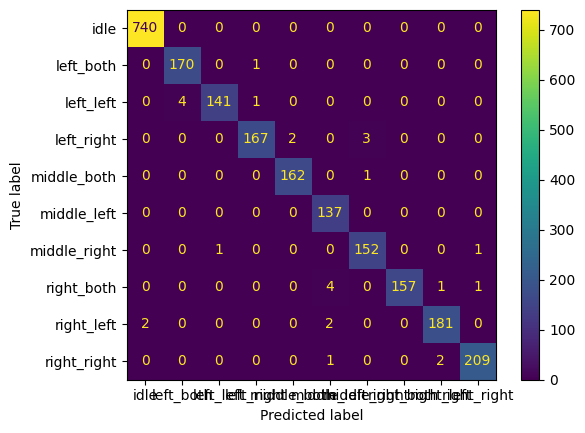

In [103]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [104]:
val = preprocess_data('SkeletonData/reaching/val', 34)
print(val.shape)
val.head()

(2016, 104)


,timestamp,keypoint0_x,keypoint0_y,keypoint0_z,keypoint1_x,keypoint1_y,keypoint1_z,keypoint2_x,keypoint2_y,keypoint2_z,...,keypoint31_x,keypoint31_y,keypoint31_z,keypoint32_x,keypoint32_y,keypoint32_z,keypoint33_x,keypoint33_y,keypoint33_z,label
0,1704889836522197296,0.048453,-0.023608,-1.789519,0.043350,0.143069,-1.758568,0.036999,0.309725,-1.727737,...,-0.074481,0.680517,-1.667431,0.205153,-0.690328,-2.096393,-0.092077,-0.717391,-2.043044,idle
1,1704889836538824296,0.048761,-0.023367,-1.788558,0.043664,0.143382,-1.757988,0.037158,0.310084,-1.727438,...,-0.074115,0.681086,-1.667259,0.202895,-0.694024,-2.086805,-0.093804,-0.716114,-2.044682,idle
2,1704889836555458296,0.049127,-0.023471,-1.790585,0.043835,0.143203,-1.759632,0.037212,0.309854,-1.728814,...,-0.073691,0.681031,-1.668214,0.202153,-0.693305,-2.090713,-0.092875,-0.714705,-2.051036,idle
3,1704889836572190296,0.049521,-0.023418,-1.793260,0.043869,0.143132,-1.761698,0.037064,0.309680,-1.730358,...,-0.073416,0.680927,-1.668330,0.203966,-0.691105,-2.097568,-0.091745,-0.713078,-2.058387,idle
4,1704889836588813296,0.049706,-0.023901,-1.793698,0.043925,0.142658,-1.762206,0.036962,0.309197,-1.730851,...,-0.073058,0.680741,-1.668773,0.204462,-0.689114,-2.103490,-0.092345,-0.715429,-2.053857,idle


In [105]:
clf.classes_

array(['idle', 'left_both', 'left_left', 'left_right', 'middle_both',
       'middle_left', 'middle_right', 'right_both', 'right_left',
       'right_right'], dtype=object)

In [106]:
# save
with open('models/model.pkl','wb') as f:
    pickle.dump(clf,f)

In [107]:
data2 = pd.read_csv('data/reaching.csv')
data.head()

,timestamp,keypoint0_x,keypoint0_y,keypoint0_z,keypoint1_x,keypoint1_y,keypoint1_z,keypoint2_x,keypoint2_y,keypoint2_z,...,keypoint31_x,keypoint31_y,keypoint31_z,keypoint32_x,keypoint32_y,keypoint32_z,keypoint33_x,keypoint33_y,keypoint33_z,label
0,1704889774828782883,-0.014658,-0.010414,-1.850142,-0.022172,0.153224,-1.809294,-0.029819,0.316912,-1.768672,...,-0.147914,0.686057,-1.711049,0.160236,-0.774624,-2.250339,-0.153954,-0.772441,-2.279737,idle
1,1704889774845267883,-0.015942,-0.011453,-1.844799,-0.023581,0.152472,-1.805140,-0.031363,0.316371,-1.765403,...,-0.150290,0.685352,-1.708663,0.158441,-0.784999,-2.226288,-0.151893,-0.774630,-2.273041,idle
2,1704889774862022883,-0.018025,-0.011624,-1.843084,-0.025777,0.152338,-1.803595,-0.033593,0.316312,-1.764172,...,-0.152861,0.685190,-1.707633,0.159013,-0.785980,-2.222081,-0.152055,-0.775504,-2.270406,idle
3,1704889774878767883,-0.019436,-0.012791,-1.839916,-0.027406,0.151338,-1.801162,-0.035394,0.315465,-1.762407,...,-0.155392,0.684193,-1.706544,0.158305,-0.789399,-2.213517,-0.149688,-0.781246,-2.259269,idle
4,1704889774895267883,-0.020370,-0.013979,-1.837214,-0.028488,0.150334,-1.799268,-0.036839,0.314627,-1.761291,...,-0.157745,0.683246,-1.706491,0.155123,-0.794861,-2.201306,-0.144787,-0.787118,-2.247998,idle


In [108]:
skeleton = data2.iloc[0]
skeleton = skeleton.drop(['label', 'timestamp'])
skeleton.head()

keypoint0_x   -0.014658
keypoint0_y   -0.010414
keypoint0_z   -1.850142
keypoint1_x   -0.022172
keypoint1_y    0.153224
Name: 0, dtype: object

In [109]:
skeleton_reshaped = np.array(skeleton).reshape(1,-1)
skeleton_reshaped

array([[-0.0146579053252935, -0.0104139745235443, -1.850142240524292,
        -0.0221721343696117, 0.1532241702079773, -1.8092942237854004,
        -0.0298186633735895, 0.3169123828411102, -1.768671989440918,
        -0.0374654233455657, 0.4806054830551147, -1.72804856300354,
        0.0085653346031904, 0.483316957950592, -1.726496696472168,
        0.1428063511848449, 0.4886254370212555, -1.7226184606552124,
        0.1908044517040252, 0.250947892665863, -1.835139274597168,
        0.2120332717895507, -0.0052025020122528, -1.8360480070114136,
        0.2162790298461914, -0.0564325787127018, -1.8362298011779783,
        0.2247705608606338, -0.15889273583889, -1.8365932703018188,
        0.1609155833721161, -0.1125492602586746, -1.8515170812606807,
        -0.0835792869329452, 0.4796731472015381, -1.7291587591171265,
        -0.2178203016519546, 0.4743646681308746, -1.733036994934082,
        -0.2450360059738159, 0.2175720036029815, -1.8021180629730225,
        -0.2705544829368591, -0.0

In [110]:
pred = clf.predict(skeleton_reshaped)

c:\Users\thiel\.conda\envs\project3-1\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [111]:
pred[0]

'idle'

In [112]:
with open('models/model34.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [113]:
clf2.predict(skeleton_reshaped)

c:\Users\thiel\.conda\envs\project3-1\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['idle'], dtype=object)

In [114]:
normalize_data(skeleton)

KeyError: 'timestamp'